# Time Series Prediction

References: [Machine Learning Mastery blog](https://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/).

## Import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM, SimpleRNN
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

# fix random seed for reproducibility
np.random.seed(10)

Using TensorFlow backend.


## Load data

<function matplotlib.pyplot.show(*args, **kw)>

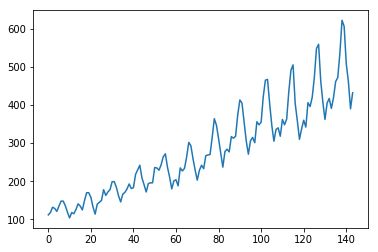

In [2]:
dataframe = pd.read_csv('./airline-passengers.csv', usecols=[1], engine='python')

# plot dataset
plt.plot(dataframe)
plt.show

## Data normalization

In [14]:
dataset = dataframe.values
dataset = dataset.astype('float32')
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

## Split data into training and testing set

In [15]:
train_size = int(len(dataset) * 0.7)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

print("Size of training set ", len(train))
print("Size of testing set ", len(test))

Size of training set  100
Size of testing set  44


In [5]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX = []
    dataY = []
    
    for i in range(len(dataset)-look_back):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [16]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

## Vanilla RNN

### Define model

In [21]:
model = Sequential()
model.add(SimpleRNN(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_2 (SimpleRNN)     (None, 4)                 24        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 5         
Total params: 29
Trainable params: 29
Non-trainable params: 0
_________________________________________________________________


### Training

In [22]:
# Training
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=1)

Epoch 1/100
99/99 [==============================] - 1s 7ms/step - loss: 0.0744
Epoch 2/100
99/99 [==============================] - 0s 3ms/step - loss: 0.0290
Epoch 3/100
99/99 [==============================] - 0s 3ms/step - loss: 0.0221
Epoch 4/100
99/99 [==============================] - 0s 3ms/step - loss: 0.0189
Epoch 5/100
99/99 [==============================] - 0s 3ms/step - loss: 0.0163
Epoch 6/100
99/99 [==============================] - 0s 3ms/step - loss: 0.0138
Epoch 7/100
99/99 [==============================] - 0s 3ms/step - loss: 0.0117
Epoch 8/100
99/99 [==============================] - 0s 4ms/step - loss: 0.0094
Epoch 9/100
99/99 [==============================] - 0s 3ms/step - loss: 0.0075
Epoch 10/100
99/99 [==============================] - 0s 3ms/step - loss: 0.0060
Epoch 11/100
99/99 [==============================] - 0s 3ms/step - loss: 0.0048
Epoch 12/100
99/99 [==============================] - 0s 3ms/step - loss: 0.0038
Epoch 13/100
99/99 [=================

### Evaluation

Train Score: 23.18 RMSE
Test Score: 52.60 RMSE


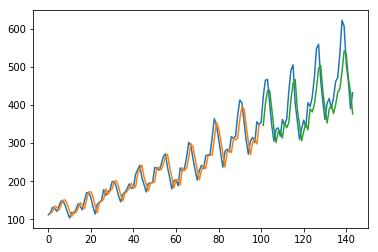

In [23]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY_ = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY_ = scaler.inverse_transform([testY])

# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY_[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY_[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2):len(dataset), :] = testPredict

# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

## LSTM

### Define model

In [24]:
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 4)                 96        
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 5         
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________


### Training

In [25]:
# Training
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=1)

Epoch 1/100
99/99 [==============================] - 1s 13ms/step - loss: 0.0639
Epoch 2/100
99/99 [==============================] - 0s 5ms/step - loss: 0.0330
Epoch 3/100
99/99 [==============================] - 0s 5ms/step - loss: 0.0235
Epoch 4/100
99/99 [==============================] - 1s 5ms/step - loss: 0.0209
Epoch 5/100
99/99 [==============================] - 1s 5ms/step - loss: 0.0196
Epoch 6/100
99/99 [==============================] - 0s 5ms/step - loss: 0.0185
Epoch 7/100
99/99 [==============================] - 1s 5ms/step - loss: 0.0174
Epoch 8/100
99/99 [==============================] - 0s 5ms/step - loss: 0.0162
Epoch 9/100
99/99 [==============================] - 0s 5ms/step - loss: 0.0150
Epoch 10/100
99/99 [==============================] - 0s 5ms/step - loss: 0.0138
Epoch 11/100
99/99 [==============================] - 0s 5ms/step - loss: 0.0120
Epoch 12/100
99/99 [==============================] - 0s 5ms/step - loss: 0.0104
Epoch 13/100
99/99 [================

### Evaluation

Train Score: 23.44 RMSE
Test Score: 50.17 RMSE


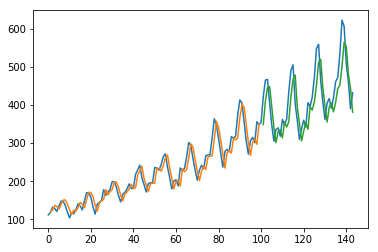

In [26]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY_ = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY_ = scaler.inverse_transform([testY])

# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY_[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY_[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2):len(dataset), :] = testPredict

# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()